# Exploration of Dandiset 000673 with PyNWB

**Disclaimer:** This Jupyter notebook was automatically generated using AI-driven tooling (`dandi-notebook-gen`) based on Dandiset 000673. The content has not been fully verified. Users should exercise caution and validate code, descriptions, and results before use in research.

---

## Dataset overview
Title: **Control of working memory by phase–amplitude coupling of human hippocampal neurons**  
Dandiset ID: **000673**  
Version: **draft**  

**Description:**  
Retaining information in working memory is a demanding process that relies on cognitive control. This Dandiset supports research into how phase-amplitude coupling coordinates cognitive control and working memory via human medial temporal and frontal recordings, including spikes, LFPs, task events, and behavioral data.

**Keywords:** cognitive neuroscience, working memory, neurophysiology, intracranial recordings, NWB  

**Sample publication citation:**  
Daume et al. (2025). Data for: Control of working memory by phase–amplitude coupling... DANDI Archive. https://dandiarchive.org/dandiset/000673/draft

### What this notebook covers
- Enumerate Dandiset assets
- Load and summarize a representative NWB file
- Visualize local field potentials (LFPs)
- Examine stimulus images presented to the subject
- Overview of events and behavioral timing
- Outline pathways for further analysis

---

## List all assets in the Dandiset using DANDI API

In [1]:
from dandi.dandiapi import DandiAPIClient
client = DandiAPIClient()
dandiset = client.get_dandiset("000673")
assets = list(dandiset.get_assets())
print(f"Number of assets in Dandiset: {len(assets)}")
for asset in assets[:5]:
    print(f"{asset.path} ({asset.size} bytes)")
print("...") 

Number of assets in Dandiset: 44
sub-11/sub-11_ses-1_ecephys+image.nwb (679215592 bytes)
sub-12/sub-12_ses-1_ecephys+image.nwb (518882687 bytes)
sub-1/sub-1_ses-1_ecephys+image.nwb (745833239 bytes)
sub-1/sub-1_ses-2_ecephys+image.nwb (690528032 bytes)
sub-10/sub-10_ses-1_ecephys+image.nwb (519312053 bytes)
...


## Load example NWB data file remotely using PyNWB and remfile

In [2]:
import pynwb
import h5py
import remfile

url = "https://api.dandiarchive.org/api/assets/65a7e913-45c7-48db-bf19-b9f5e910110a/download/"
file = remfile.File(url)
f = h5py.File(file)
io = pynwb.NWBHDF5IO(file=f, load_namespaces=True)
nwb = io.read()

print('Session description:', nwb.session_description)
print('Subject ID:', nwb.subject.subject_id)
print('Session start time:', nwb.session_start_time)
print('Sampling rate (Hz):', nwb.acquisition['LFPs'].rate)
print('Shape of LFP data:', nwb.acquisition['LFPs'].data.shape)
print('Number of behavioral events:', nwb.acquisition['events'].data.shape[0])
print('Number of stimulus images:', len(nwb.stimulus_template['StimulusTemplates'].images.keys()))
print('Number of units:', len(nwb.units.id))

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


/opt/conda/lib/python3.11/site-packages/pynwb/ecephys.py:109: UserWarning: ElectricalSeries 'LFPs': The second dimension of data does not match the length of electrodes. Your data may be transposed.
  warnings.warn("%s '%s': The second dimension of data does not match the length of electrodes. "


Session description: SBCAT_ID: 1
Subject ID: 1
Session start time: 2018-01-01 00:00:00-08:00
Sampling rate (Hz): 400.0
Shape of LFP data: (550276, 70)
Number of behavioral events: 982
Number of stimulus images: 281
Number of units: 46


## Preview a snippet of raw LFP data
The plot below shows raw LFP signals from 10 channels over a 2-second window. Note that some noise or artifacts are visible on certain channels.

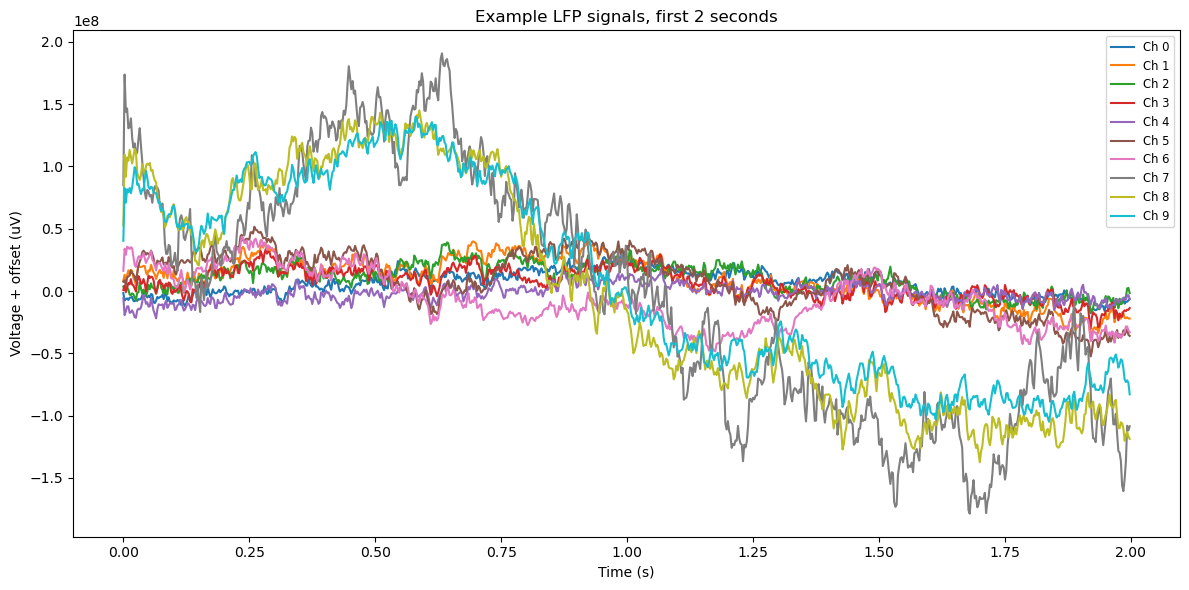

In [3]:
import matplotlib.pyplot as plt
import numpy as np

lfp = nwb.acquisition['LFPs']
rate = lfp.rate
data = lfp.data
num_samples = int(rate * 2)  # 2 seconds
channels = np.arange(min(10, data.shape[1]))
snippet = data[0:num_samples, channels]
tvec = np.arange(num_samples) / rate

plt.figure(figsize=(12, 6))
for i, ch in enumerate(channels):
    plt.plot(tvec, snippet[:, i] * 1e6 + i * 200, label=f'Ch {ch}')
plt.xlabel('Time (s)')
plt.ylabel('Voltage + offset (uV)')
plt.title('Example LFP signals, first 2 seconds')
plt.legend(fontsize='small')
plt.tight_layout()
plt.show()

## Visualize example behavioral event timings
Histogram of event timestamps during the recording.

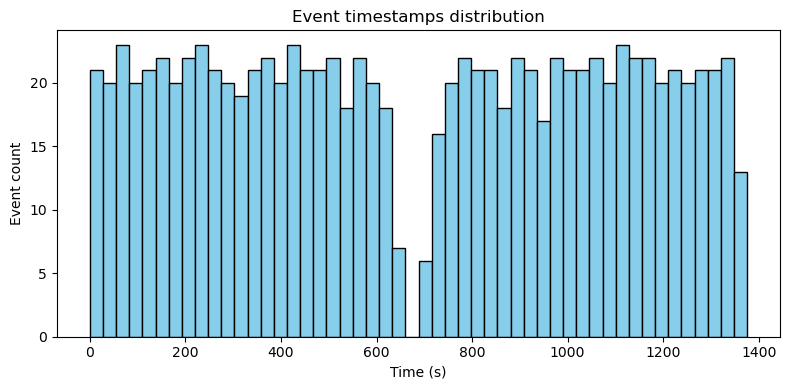

In [4]:
timestamps = nwb.acquisition["events"].timestamps[:]

plt.figure(figsize=(8, 4))
plt.hist(timestamps, bins=50, color='skyblue', edgecolor='k')
plt.xlabel('Time (s)')
plt.ylabel('Event count')
plt.title('Event timestamps distribution')
plt.tight_layout()
plt.show()

This histogram shows two dense clusters of events separated by an epoch with fewer events, potentially corresponding to breaks or task phases.

## Preview example stimulus images
The images below are sample stimuli presented during the experiment. Note: the images are rotated as stored and might require rotation correction for analysis/display.

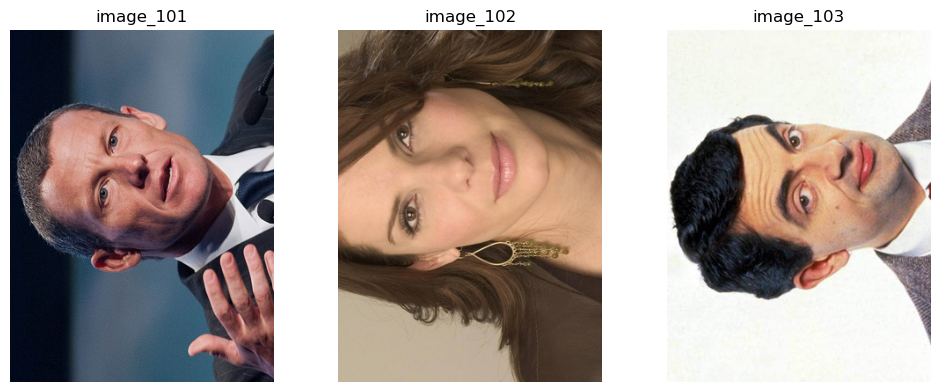

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(10,4))
keys = sorted(list(nwb.stimulus_template['StimulusTemplates'].images.keys()))[:3]
for ax, key in zip(axs, keys):
    img = nwb.stimulus_template['StimulusTemplates'].images[key].data[:]
    ax.imshow(img)
    ax.set_axis_off()
    ax.set_title(key)
plt.tight_layout()
plt.show()

## Overview of spike sorting data
This Dandiset includes sorted unit activity:
- total **46 units**
- with metadata such as spike times, waveforms, isolation metrics

Here is an example of spike times distribution in the first 5 units.

(For brevity, only a subset of data is shown.)

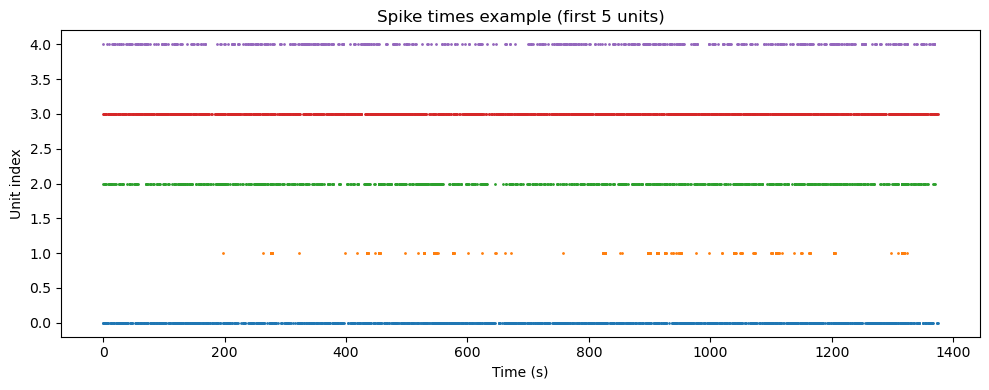

In [6]:
unit_ids = nwb.units.id[:]
plt.figure(figsize=(10, 4))
for i, unit_id in enumerate(unit_ids[:5]):
    spike_times = nwb.units['spike_times'][i]
    plt.scatter(spike_times, np.full_like(spike_times, i), s=1)
plt.xlabel('Time (s)')
plt.ylabel('Unit index')
plt.title('Spike times example (first 5 units)')
plt.tight_layout()
plt.show()

## Further analysis ideas

This dataset enables diverse analyses, including:
- Spectral analysis of LFP signals per region
- Cross-region synchronization/quenching
- Peri-stimulus/event triggered averaging
- Representational similarity analysis during cognitive tasks
- Relating spike-phase coupling to behavior

Due to computational and scope constraints, only basic exploratory examples are included here.

# Summary

This notebook demonstrated initial exploration of Dandiset 000673 including:
- Enumerating assets
- Loading a representative NWB file
- Inspecting LFP and spike data
- Examining task events and stimuli

Users should verify results, customize analyses to their questions, and consult DANDI metadata and dataset documentation. This notebook is a starting point for such inquiries.

---

**Disclaimer:** AI-generated content — validate before use.